<a href="https://colab.research.google.com/github/dGabo-jr/CURSOS-DE-PYTHON/blob/main/Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TÉCNICAS DE CLASIFICACIÓN**

[MODELOS DE CLASIFICACIÓN](https://www.canva.com/design/DAFik_IHDs4/gVjGwbXFqqN0TwNiUFTwlw/edit?utm_content=DAFik_IHDs4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

#**Teoria de Regresión logística**


El modelo de regresión logística es un tipo de modelo de aprendizaje automático que se utiliza para predecir la probabilidad de que algo suceda o no suceda.




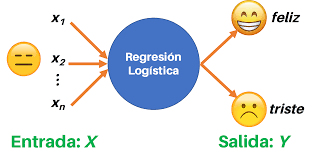

La regresión logística se utiliza para predecir la probabilidad de un evento que tiene dos posibles resultados (por ejemplo, sí o no).

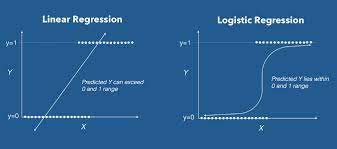

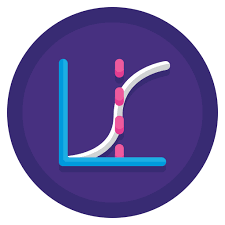

# **ALGUNOS EJEMPLOS DE APLICACIÓN:**

##**Predicción de enfermedades**


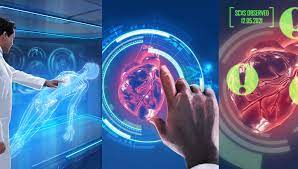

## **Predicción de compras en línea:**
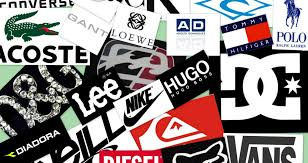


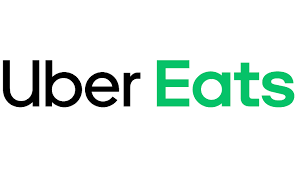


## **Análisis de crédito:** 

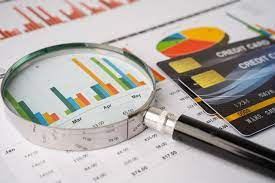

## **Evaluación de rendimiento académico: **

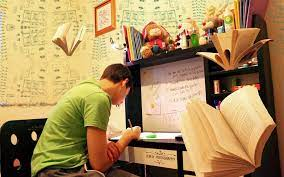

# **IMPORTAR LIBRERIAS**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns


# **ESTRUCTURA DE LA FUNCIÓN SIGMOIDE**

In [24]:
# muestra una salida discreta  (0 o 1) a traves de la función sigmoide

# esta es la regresion logistica

def function(data):
    return 1/(1+math.e**(-1.5*data))     #   f(x) = 1 / (1 + e^-x)

    yl = function(x)
    plt.plot(x,yl,"r")
    plt.show()

plt.show()

# **CARGA Y LECTURA  DE ARCHIVO EN FORMATO CSV**

[DATA SET TITANIC](https://www.kaggle.com/c/titanic)

In [25]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train.csv


In [26]:

df=pd.read_csv("train.csv")  #leer el archivo
df # visualizamos el dataframe cargado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **CONOCIENDO LOS DATOS DE TRABAJO**

In [27]:
#analizando los datos 
# Analizaremos si y vamos a predecir si un pasajero sobrevivio o no
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [28]:
#analizando la variablre de subrevivencia
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

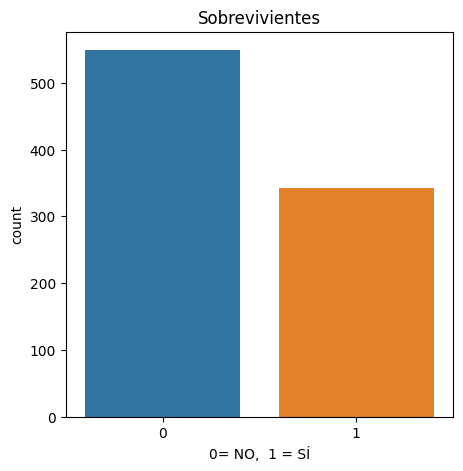

In [29]:
#mostrando en grafico el dato de los sobrevivientes y no sobrevivientes
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x="Survived", data = df)
plt.title ("Sobrevivientes")
plt.xlabel ("0= NO  1 = SÍ")
plt.show()

In [30]:
sobrevivientes = np.sum (df.Survived)
print ("Numero de sobrevivientes: ", sobrevivientes)  # numero de sobrevivientes

Numero de sobrevivientes:  342


In [31]:
nosobrevivientes = df.shape[0]- np.sum (df.Survived)
print ("Numero de no sobrevivientes: ",nosobrevivientes) 

Numero de no sobrevivientes:  549


In [32]:
sobrevivientes /df.shape[0]  # porcentaje de sobrevivientes

0.3838383838383838

In [33]:
nosobrevivientes /df.shape[0]  # porcentaje de no sobrevivientes

0.6161616161616161

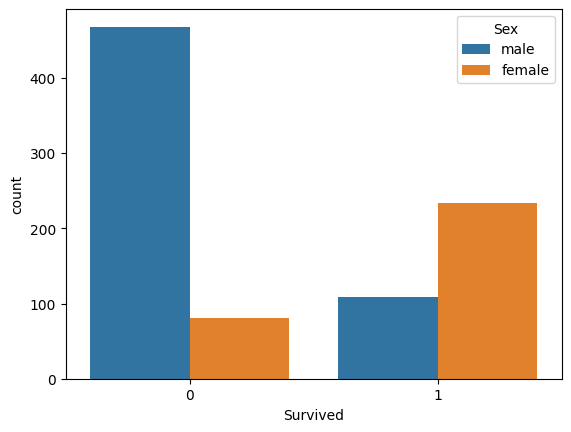

In [34]:
sns.countplot(x="Survived", hue ="Sex", data =df)
plt.show()

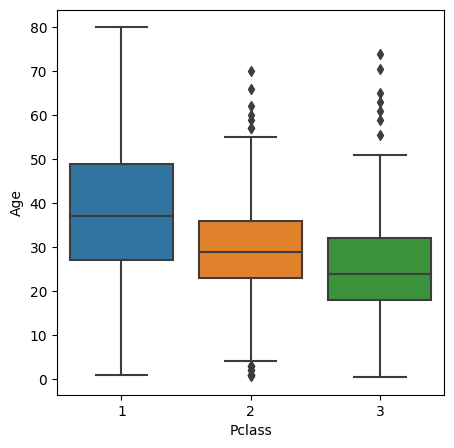

In [35]:
#mostrando en grafico el dato de los sobrevivientes y no sobrevivientes
plt.figure(figsize=(5,5))
sns.boxplot(x="Pclass",y="Age", data=df)
plt.show()

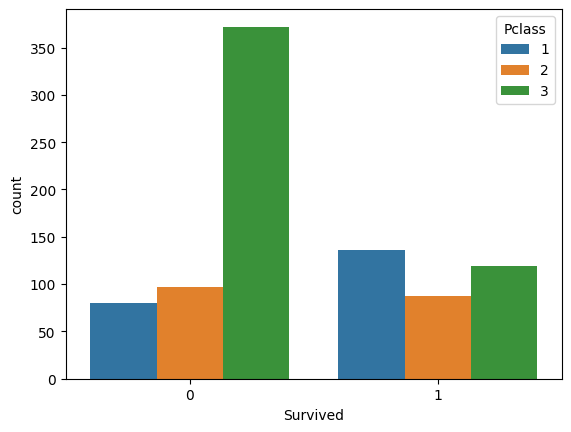

In [36]:
sns.countplot(x="Survived", hue = "Pclass", data =df)
plt.show()

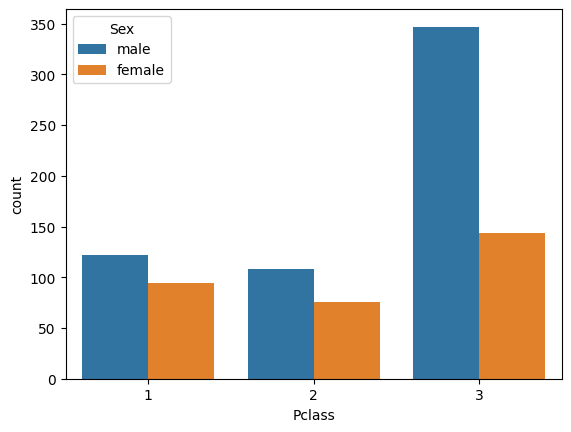

In [37]:
sns.countplot(x="Pclass", hue="Sex", data=df)
plt.show()

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **TRATAMIENTO DE LOS DATOS DE INTERES**

In [39]:
# haciendo limpieza de las columnas que no nos sirven para el analisis
df=df.drop (["PassengerId", "Cabin", "Name", "Ticket", "Age"], axis = 1)
df.head()  # esos datos son los nuevos datos que se analizará

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [40]:
# ahora cambiaremos en Sex si male=0 y female=1 y en la columna de pago Fare se cambiara de 1 el más barato al 10 que es el más caro
genders = {"male": 0, "female" :1}


data =[df]
for dataset in data:
    dataset ["Sex"] = dataset["Sex"].map(genders)
  # mostrando el cambio

df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [41]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [42]:
#Encontrando los valores nulos
df["Embarked"].isnull().sum()

2

In [43]:
#rellenamos los datos con el valor mas común siendo este "S"

common_value ="S"  #creación de una variable de este nombre con el dato más comun
data = [df]   # llamamos los datos del data y hacemos que se rellene los datos que estaban nulos con el valor más común "S"
for dataset in data:
    dataset ["Embarked"]= dataset ["Embarked"].fillna (common_value)
    

In [44]:
df["Embarked"].isnull().sum()

0

In [45]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [46]:
# cambiando ahora los valores de letras a numeros de los puertos  Embarked
ports = {"S": 0,  "C": 1, "Q": 2}
data= [df]
for dataset in data:
    dataset ["Embarked"]= dataset ["Embarked"].map(ports)

    # mostrando los valores de la columna "Embarked"
df.head(15)
    

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0
5,0,3,0,0,0,8.4583,2
6,0,1,0,0,0,51.8625,0
7,0,3,0,3,1,21.0750,0
8,1,3,1,0,2,11.1333,0
9,1,2,1,1,0,30.0708,1


In [ ]:
# ahora trasnformaremos la columna de tarifa (Fare) comenzando con agrupación

for dataset in data:
    dataset.loc[ dataset [ "Fare"]<= 10, "Fare"]=0  #asignamos los valores menores que 10 al grupo 0
    dataset.loc[ (dataset [ "Fare"]> 10) & (dataset [ "Fare"]<=20), "Fare"] =1   #asignamos los valores mayores a 10 y menores a 20 al grupo 1
    dataset.loc[ (dataset [ "Fare"]> 20) & (dataset [ "Fare"]<=30), "Fare"] =2   #asignamos los valores mayores a 20 y menores a 30 al grupo 2
    dataset.loc[ (dataset [ "Fare"]> 30) & (dataset [ "Fare"]<=100), "Fare"] =3   #asignamos los valores mayores a 30 y menores a 100 al grupo 3
    dataset.loc[ (dataset [ "Fare"]> 100) & (dataset [ "Fare"]<=250), "Fare"] =4   #asignamos los valores mayores a 100 y menores a 250 al grupo 4
    dataset.loc[ dataset [ "Fare"]> 250,"Fare"] =5   #asignamos los valores mayores a  250 al grupo 5
    dataset["Fare"] = dataset ["Fare"].astype(int)
    
    

In [ ]:
df.head(25)

In [ ]:
#ahora ya tenemos limpios los datos
#dividiendo los datos de entrenamiento y de prueba

X_data = df.drop ("Survived", axis = 1)
y_survived = df ["Survived"]


In [ ]:
X_data.head()

In [ ]:
y_survived.head()

# **PROPUESTA DEL MODELO A UTILIZAR**

In [ ]:
from sklearn.model_selection import train_test_split
#generando datos de test  (30%) y de entrenamiento del model
X_train, X_test, y_train, y_test = train_test_split(X_data, y_survived, test_size = 0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
#creando el modelo de regreción lógica

logmodel = LogisticRegression()
logmodel.fit (X_train, y_train)  

LogisticRegression()

In [ ]:
y_predict =logmodel.predict(X_test)

# **UTILIZACIÓN DE MÉTRICAS PARA EL MODELO Y SUS PREDICCIONES**

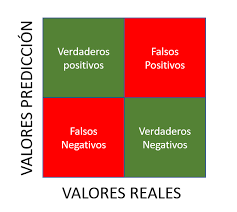

In [ ]:
#Armando la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

In [ ]:
#haciendo el grafico de la matriz de confusión

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt = "g", cmap ="Blues")
plt.show()

In [ ]:
#metricas para verificar lo bueno o malo es nuestro modelo de Regresión
from sklearn.metrics import classification_report


El informe generado por classification_report incluye las siguientes medidas para cada clase:

**Precisión:** la proporción de predicciones positivas que son verdaderamente positivas (VP / (VP + FP))

**Recuperación:** la proporción de muestras positivas que fueron correctamente identificadas (VP / (VP + FN))

**F1-score:** una medida de la precisión y la recuperación, calculada como la media armónica de la precisión y la recuperación (2 * (precisión * recuperación) / (precisión + recuperación))

**Soporte:** el número de muestras de entrenamiento que pertenecen a cada clase

In [ ]:
print (classification_report (y_test, y_predict))  # Analizando  las variables (precision    recall  f1-score   support y accuracy(veracidadad del modelo debe estar mas cercano 1 ))

In [ ]:
# guardar los cambios hechos en los datos de titanic (nuestra base de datos de trabajo)
df.head()


# **GUARDAR ARCHIVO TRABAJADO EN FORMATO CSV**

In [ ]:
#df.to_csv("Titanic_Datos_limpios_nuevos.csv", header=True)